# Exploration of overlap scores

Here I explore statistics for various sets of reference distributions

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from glob import glob
%matplotlib inline

In [3]:
def my_float(s):
    if s == 'None': return float('inf')
    return float(s)

data = {}
last_protein = None
with open('../../combind_data/bpp_outputs/') as fp:
    print fp.readline()
    for line in fp:
        (protein, struct, ligand1, ligand2,
         rank1, rank2, rmsd1, rmsd2, gscore1, gscore2,
         sb2, mcss, hbond, pipi, contact) = line.strip().split('\t')
        if protein != last_protein: print protein
        last_protein = protein
        (rmsd1, rmsd2, gscore1, gscore2,
         sb2, mcss, hbond, pipi, contact) = map(my_float, [rmsd1, rmsd2, gscore1, gscore2,
                                                           sb2, mcss, hbond, pipi, contact])
        rank1, rank2 = int(rank1), int(rank2)
        if rank1 > 10 or rank2 > 10: continue
        if protein not in data: data[protein] = {}
        if (ligand1, ligand2) not in data[protein]: data[protein][(ligand1, ligand2)] = {}
        data[protein][(ligand1, ligand2)][rank1, rank2] = {'rmsd1':rmsd1,
                                                           'rmsd2':rmsd2,
                                                           'gscore1': gscore1,
                                                           'gscore2': gscore2,
                                                           'sb2': sb2,
                                                           'mcss': mcss,
                                                           'hbond': hbond,
                                                           'pipi': pipi,
                                                           'contact': contact}

IOError: [Errno 2] No such file or directory: '../../combind_data/bpp_outputs/stats.csv'

In [3]:
for prot, ligpairs in data.items():
    print prot, len(ligpairs)

P00489 190
5HT2B 1
PLK1 66
Q16539 171
MGLUR5 10
ERA 171
M3 1
P07900 190
GLUT1 3
P18031 190
P56817 190
O60885 136
MEK1 190
JAK2 190
P00742 190
DTRANSP 36
SIGMA1 1
P00734 190
P00760 190
B2AR 28
GCR 153
P24941 78
B1AR 66
VITD 190
A2AR 153
SMO 21
P03951 91
P00749 190
Q9Y233 190
CHK1 190
TRPV1 1
CDK2 190
AR 55
BRAF 171
MR 78
STRANSP 10


In [4]:
from sklearn.neighbors import KernelDensity

def reflect(x, y):
    x, y = np.array(x), np.array(y)
    center_x, center_y = x[(0<=x)*(x<1)], y[(0<=x)*(x<1)]
    left_x, left_y     = x[x < 0], y[x < 0]
    right_x, right_y   = x[x > 1], y[x > 1]
    center_y += left_y[::-1]
    center_y += right_y[::-1]
    return center_x, center_y

def plot(native, decoy):
    
    print sum(native == float('inf')), native.shape
    print sum(decoy == float('inf')), decoy.shape
    
    native = native[native != float('inf')]
    decoy = decoy[decoy != float('inf')]
    
    # histogram
    plt.hist([native, decoy], normed = True, label = ['native', 'decoy'])
    plt.legend()
    plt.show()
    
    # KDE
    x = np.linspace(-1, 2, 301)
    native_kernel = KernelDensity(bandwidth = 0.05).fit(native.reshape(-1, 1))
    decoy_kernel  = KernelDensity(bandwidth = 0.05).fit(decoy.reshape(-1, 1))
    native_kde = np.exp(native_kernel.score_samples(x.reshape(-1, 1)))
    decoy_kde = np.exp(decoy_kernel.score_samples(x.reshape(-1, 1)))

    # Reflected KDE
    center, native_center = reflect(x, native_kde)
    center, decoy_center = reflect(x, decoy_kde)
    plt.plot(center, native_center, label = 'native')
    plt.plot(center, decoy_center, label = 'decoy')
    plt.show()

    # Energy
    plt.plot(center, - np.log(native_center / decoy_center))
    plt.show()

# Top 10 poses

(80461,) (405416,)
60938 (80461,)
288626 (405416,)


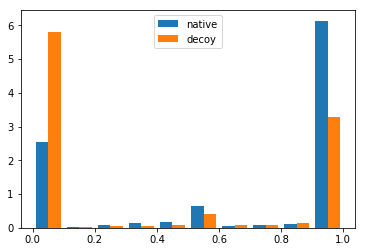

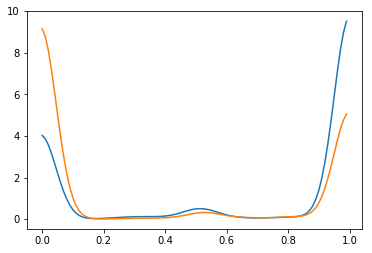

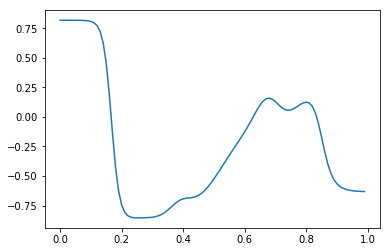

(80461,) (405416,)
930 (80461,)
2710 (405416,)


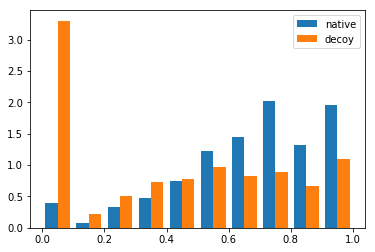

KeyboardInterrupt: 

In [5]:
for interaction in ['sb2', 'hbond', 'mcss', 'contact']:
    native, decoy = [], []
    for protein, ligpairs in data.items():
        for (lig1, lig2), posepairs in ligpairs.items():
            for (rank1, rank2), fp in posepairs.items():
                if rank1 < 10 and rank2 < 10:
                    if fp['rmsd1'] <= 2 and fp['rmsd2'] <= 2:
                        native += [fp[interaction]]
                    decoy += [fp[interaction]]
    native, decoy = np.array(native), np.array(decoy)
    print native.shape, decoy.shape
    plot(native, decoy)

# Top Pose Only

In [ ]:
for interaction in ['sb2', 'hbond', 'mcss', 'pipi', 'contact']:
    native, decoy = [], []
    for protein, ligpairs in data.items():
        for (lig1, lig2), posepairs in ligpairs.items():
            for (rank1, rank2), fp in posepairs.items():
                if rank1 == rank2 == 0:
                    if fp['rmsd1'] <= 2 and fp['rmsd2'] <= 2:
                        native += [fp[interaction]]
                    decoy += [fp[interaction]]
    native, decoy = np.array(native), np.array(decoy)
    print interaction
    print native.shape, decoy.shape
    plot(native, decoy)

In [ ]:
for interaction in ['sb2', 'hbond', 'mcss', 'contact', 'pipi']:
    native, decoy = [], []
    for protein, ligpairs in data.items():
        for (lig1, lig2), posepairs in ligpairs.items():
            for (rank1, rank2), fp in posepairs.items():
                if rank1 == rank2 == 0:
                    decoy += [fp[interaction]]
                if fp['rmsd1'] <= 2 and fp['rmsd2'] <= 2:
                    native += [fp[interaction]]
                    break
    native, decoy = np.array(native), np.array(decoy)
    print interaction
    print native.shape, decoy.shape
    plot(native, decoy)

# Top Glide Incorrect v. First Correct

In [ ]:
for interaction in ['sb2', 'hbond', 'mcss', 'contact']:
    native, decoy = [], []
    for protein, ligpairs in data.items():
        for (lig1, lig2), posepairs in ligpairs.items():
            for (rank1, rank2), fp in posepairs.items():
                if rank1 == rank2 == 0:
                    if fp['rmsd1'] <= 2 and fp['rmsd2'] <= 2:
                        break
                    decoy += [fp[interaction]]
                if fp['rmsd1'] <= 2 and fp['rmsd2'] <= 2:
                    native += [fp[interaction]]
                    break
    native, decoy = np.array(native), np.array(decoy)
    print interaction
    print native.shape, decoy.shape
    plot(native, decoy)

# First correct versus most similar incorrect

In [ ]:
for interaction in ['sb2', 'hbond', 'mcss', 'contact']:
    native, decoy = [], []
    for protein, ligpairs in data.items():
        for (lig1, lig2), posepairs in ligpairs.items():
            _decoy = []
            _native = None
            for (rank1, rank2), fp in posepairs.items():
                if fp['rmsd1'] <= 2 and fp['rmsd2'] <= 2 and _native is None:
                    _native = fp[interaction]
                if sum([fp['rmsd1'] > 2, fp['rmsd2'] > 2]) == 1:
                    _decoy += [fp[interaction]]
            if _decoy and _native:
                native += [_native]
                decoy += [max(_decoy)]
    native, decoy = np.array(native), np.array(decoy)
    print interaction
    print native.shape, decoy.shape
    plot(native, decoy)

# Machine Learning Perspective

In [6]:
X = []
y = []
for protein, ligpairs in data.items():
    for (lig1, lig2), posepairs in ligpairs.items():
        for (rank1, rank2), fp in posepairs.items():
            if not max(rank1,rank2) < 5: continue
            features = [fp[interaction] for interaction in ['mcss', 'hbond', 'sb2', 'contact']]
            features += [-fp['gscore1']-fp['gscore2']]
            X += [features]
            y += [fp['rmsd1'] <= 2 and fp['rmsd2'] <= 2]

In [7]:
X = np.vstack(X)
y = np.array(y)

In [8]:
X[X == float('inf')] = 0

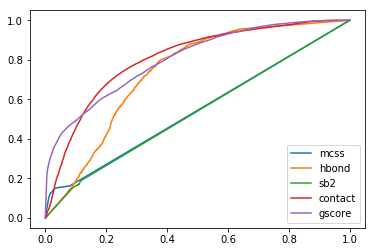

In [9]:
from sklearn import metrics
def roc(y, y_hat, label):
    fpr, tpr, thresholds = metrics.roc_curve(y, y_hat, pos_label = 1)
    plt.plot(fpr, tpr, label = label)
    
for i, feature in enumerate(['mcss', 'hbond', 'sb2', 'contact', 'gscore']):
    roc(y, X[:, i], feature)
plt.legend()
plt.show()

[[ 1.03010071  1.47607719  0.47748635  8.18541496  0.3062442 ]]


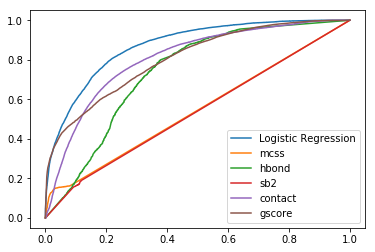

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

lr = LogisticRegression().fit(X, y)
roc(y, lr.predict_proba(X)[:, 1], 'Logistic Regression')
print lr.coef_

for i, feature in enumerate(['mcss', 'hbond', 'sb2', 'contact', 'gscore']):
    roc(y, X[:, i], feature)
plt.legend()
plt.show()

In [11]:
from sklearn.neighbors import KernelDensity

# This takes ~10 minutes to run
def energy(native, feature):
    print 'enter'
    native_kernel = KernelDensity(bandwidth = 0.05
                                 ).fit(feature[native == 1].reshape(-1, 1))
    decoy_kernel  = KernelDensity(bandwidth = 0.05
                                 ).fit(feature[native == 0].reshape(-1, 1))
    return lambda x: - (  native_kernel.score_samples(x)
                        -  decoy_kernel.score_samples(x))

energies = [energy(y, X[:, i]) for i in range(5)]

enter
enter
enter
enter
enter


In [12]:
X_energy = np.vstack([energies[i](X[:, i].reshape(-1, 1)) for i in range(5)]).T

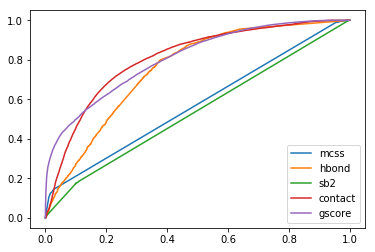

In [13]:
for i, feature in enumerate(['mcss', 'hbond', 'sb2', 'contact', 'gscore']):
    roc(y, -X_energy[:, i], feature)
plt.legend()
plt.show()

[[ 1.02697774  1.47517057  0.48561106  8.50388004  0.30684035]]
[[-0.56144968 -0.56644916 -0.74989028 -0.79466459 -0.70503945]]


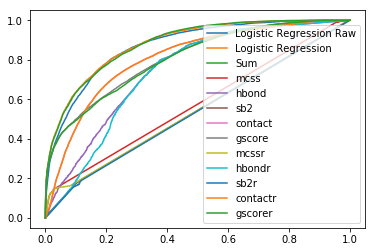

In [49]:
lr = LogisticRegression(penalty = 'l1').fit(X, y)
roc(y, lr.predict_proba(X)[:, 1], 'Logistic Regression Raw')
print lr.coef_

lr = LogisticRegression(penalty = 'l1').fit(X_energy, y)
roc(y, lr.predict_proba(X_energy)[:, 1], 'Logistic Regression')
print lr.coef_
roc(y, -X_energy.sum(axis = 1), 'Sum')

for i, feature in enumerate(['mcss', 'hbond', 'sb2', 'contact', 'gscore']):
    roc(y, -X_energy[:, i], feature)

for i, feature in enumerate(['mcssr', 'hbondr', 'sb2r', 'contactr', 'gscorer']):
    roc(y, X[:, i], feature)
plt.legend()
plt.show()

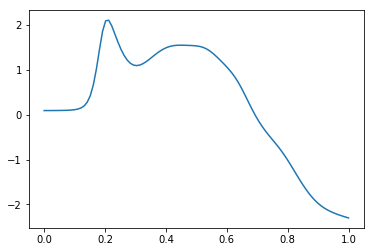

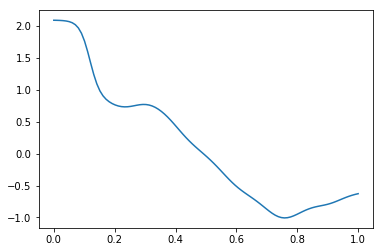

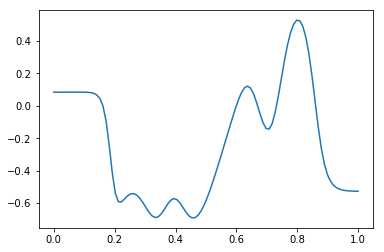

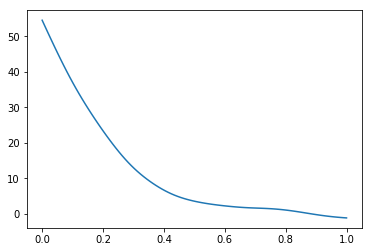

In [27]:
x = np.linspace(0, 1, 100).reshape(-1, 1)
for i in range(4):
    plt.plot(x, energies[i](x))
    plt.show()

(-10, 10)

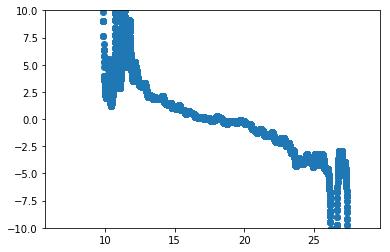

In [36]:
plt.scatter(X[:, -1], X_energy[:, -1])
plt.ylim(-10, 10)